In [1]:
%run load-clean-select.ipynb

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Morphology was measured for 610.0 cells.

The numbers of cells and nuclei correspond to each other.

The are no duplicated column names: True
The are no duplicated column names: True
Cytoplasm measurements were taken for 610 cells.

The are no duplicated column names: True
Read biomarkers normalised by to min gain
Biomarkers were measured for 610 cells.

The are no duplicated column names: True

Full dataset has shape: (610, 484)
Initial shape is: (610, 484)
Features with zero variance:
 Index(['centerZ_cell', 'eulernumber_cell', 'children_cytoplasm_count_cell',
       'loc_centermassintensityZ_wga', 'loc_centerZ_cell',
       'loc_maxintensityZ_wga', 'centerZ_nucl', 'eulernumber_nucl',
       'children_cells_count', 'children_cytoplasm_count_nucl',
       'loc_centermassintensityZ_dapi', 'loc_centerZ_nucl',
       'loc_maxintensityZ_dapi', 'centerZ_cyto',
       'loc_centermassintensityZ_ker', 'loc_centermassintensityZ_vim',
       'loc_centerZ', 'loc_maxintensityZ_ker', 'loc_maxinten

# Which dataset?

In [2]:
# The full dataset
# df = measurements
# Dataset without clusters at 64kPa
# df = measurements_red
# Dataset without 0.5kPa, 8kPa and clusters at 64kPa
df = measurements_5
# Dataset without 0.5kPa, 8kPa and clusters at 64kPa with balanced classes
# df = measurements_b

# Predict stiffness using morphology

# Classification

In [3]:
# Feature map and response variable
cols = geom_cols

X = df[cols]
y = df.stiffness

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

rf_clf = RandomForestClassifier()

Training set size: (368, 116)
Test set size: (92, 116)


In [4]:
# Number of trees in random forest
n_estimators = [1000]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [4]

# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(10, 100, num = 10)]
max_features.append('auto')

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

best_rf_clf = rf.random_search_param(rf_clf, X_train, y_train, param_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:
 {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 20, 'max_depth': 90, 'bootstrap': True}


** Save the best estimator**

In [17]:
joblib.dump(best_rf_clf, 'models/geom-to-stiff-clf.pkl')

['models/geom-to-stiff-clf.pkl']

In [6]:
rf.train_test(best_rf_clf, 0, X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 


Number of observations of each class in the training set:
 2.0     138
16.0     80
0.2      60
32.0     46
64.0     44
Name: stiffness, dtype: int64

Number of observations of each class in the test set:
 2.0     24
0.2     23
64.0    19
16.0    17
32.0     9
Name: stiffness, dtype: int64

Null accuraccy: 0.2608695652173913
Testing accuraccy: 0.32608695652173914
Testing f-score: 0.21260189469046048
      2.0  0.2  64.0  16.0  32.0
2.0    22    0     0     1     1
0.2    19    0     0     3     1
64.0   11 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Important features
                                 feature    weight
88    neighbors_firstclosestdistance_20  0.024967
47    neighbors_secondclosestdistance_3  0.024161
90   neighbors_secondclosestdistance_20  0.024072
9                        perimeter_cell  0.020742
42     neighbors_firstclosestdistance_3  0.020391
115                                 ncr  0.020168
10                        solidity_cell  0.017938
56                        solidity_nucl  0.017597
60                     zernike_2_2_nucl  0.016404
7                  minoraxislength_cell  0.015608
4                       formfactor_cell  0.014743
79                     zernike_8_4_nucl  0.013322


,feature,weight
88,neighbors_firstclosestdistance_20,0.024967
47,neighbors_secondclosestdistance_3,0.024161
90,neighbors_secondclosestdistance_20,0.024072
9,perimeter_cell,0.020742
42,neighbors_firstclosestdistance_3,0.020391
115,ncr,0.020168
10,solidity_cell,0.017938
56,solidity_nucl,0.017597
60,zernike_2_2_nucl,0.016404
7,minoraxislength_cell,0.015608


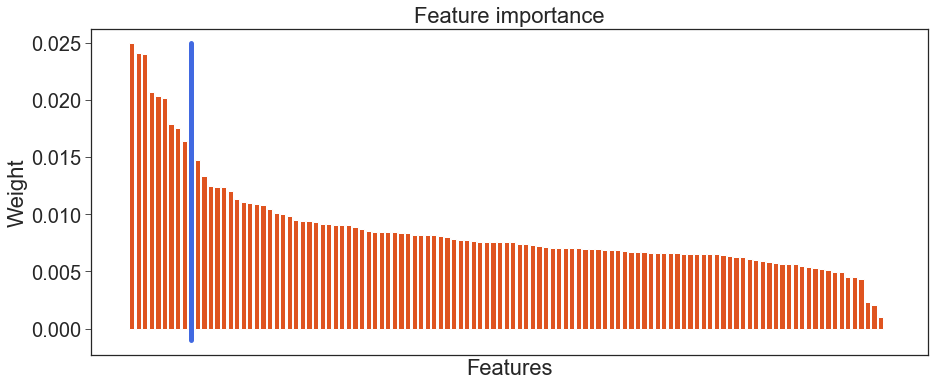

In [8]:
rf.get_important_features(best_rf_clf, X.columns)

# Regression

In [9]:
X = df[cols]
y = pd.to_numeric(df.stiffness)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

rf_reg = RandomForestRegressor()

Training set size: (368, 116)
Test set size: (92, 116)


In [11]:
best_rf_reg = rf.random_search_param(rf_reg, X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.7min finished
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:
 {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 20, 'bootstrap': True}


** Save the best estimator**

In [16]:
joblib.dump(best_rf_reg, 'models/geom-to-stiff-reg.pkl')

['models/geom-to-stiff-reg.pkl']

In [13]:
rf.train_test(best_rf_reg, 1, X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 

Null RMSE: 24.801041581273722
Testing RMSE: 23.327900913566346


Important features
                                 feature    weight
42     neighbors_firstclosestdistance_3  0.036153
47    neighbors_secondclosestdistance_3  0.031545
90   neighbors_secondclosestdistance_20  0.025879
101                    zernike_5_3_cyto  0.015014
115                                 ncr  0.014921
88    neighbors_firstclosestdistance_20  0.014652
64                     zernike_4_2_nucl  0.014338
7                  minoraxislength_cell  0.013926
79                     zernike_8_4_nucl  0.013506
87   neighbors_anglebetweenneighbors_20  0.013132
10                        solidity_cell  0.012823
46         neighbors_percenttouching_30  0.012766


,feature,weight
42,neighbors_firstclosestdistance_3,0.036153
47,neighbors_secondclosestdistance_3,0.031545
90,neighbors_secondclosestdistance_20,0.025879
101,zernike_5_3_cyto,0.015014
115,ncr,0.014921
88,neighbors_firstclosestdistance_20,0.014652
64,zernike_4_2_nucl,0.014338
7,minoraxislength_cell,0.013926
79,zernike_8_4_nucl,0.013506
87,neighbors_anglebetweenneighbors_20,0.013132


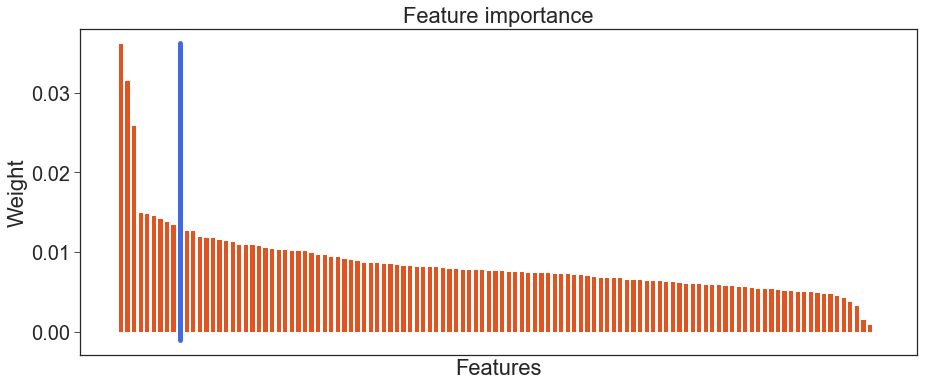

In [14]:
rf.get_important_features(best_rf_reg, X.columns)